<a href="https://colab.research.google.com/github/Ameya-20/BusinessAnalyticsProjects/blob/main/Supply-Chain%20Analytics/Supply_Chain_Analytics_for_ShippingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supply Chain Shipment Pricing Data - Data Analysis and Modeling

Dataset URL - https://www.kaggle.com/divyeshardeshana/supply-chain-shipment-pricing-data

# Data Loading and Understanding

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import pandas as pd
import numpy as np
from decimal import Decimal
import matplotlib.pyplot as plt
import seaborn as sn
import os
import plotly.graph_objs as go
import plotly.offline as py

In [9]:
DataSet = pd.read_csv("/content/drive/MyDrive/Data/SCMS_Delivery_History_Dataset.csv")
df = pd.read_csv("/content/drive/MyDrive/Data/SCMS_Delivery_History_Dataset.csv")

In [10]:
DataSet = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/SCMS_Delivery_History_Dataset.csv")

In [ ]:
# Take a first look
DataSet.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [ ]:
TotalRowCount = len(DataSet)
print("Total Number of Data Count :", TotalRowCount)

Total Number of Data Count : 10324


In [ ]:
# check our datatypes
DataSet.dtypes

ID                                int64
Project Code                     object
PQ #                             object
PO / SO #                        object
ASN/DN #                         object
Country                          object
Managed By                       object
Fulfill Via                      object
Vendor INCO Term                 object
Shipment Mode                    object
PQ First Sent to Client Date     object
PO Sent to Vendor Date           object
Scheduled Delivery Date          object
Delivered to Client Date         object
Delivery Recorded Date           object
Product Group                    object
Sub Classification               object
Vendor                           object
Item Description                 object
Molecule/Test Type               object
Brand                            object
Dosage                           object
Dosage Form                      object
Unit of Measure (Per Pack)        int64
Line Item Quantity                int64


### Let's see the top 10 countries in this dataset

In [ ]:
DataSet = DataSet.dropna()
ItemCount = DataSet["Country"].value_counts().nlargest(10)
print("Top 10 Countries Wise Count")
print(ItemCount)

Top 10 Countries Wise Count
South Africa     1364
Nigeria           952
Côte d'Ivoire     827
Uganda            724
Vietnam           661
Haiti             549
Mozambique        506
Zimbabwe          471
Zambia            470
Tanzania          374
Name: Country, dtype: int64


### Now let's visualize it

Text(0.5, 0, 'Country Name')

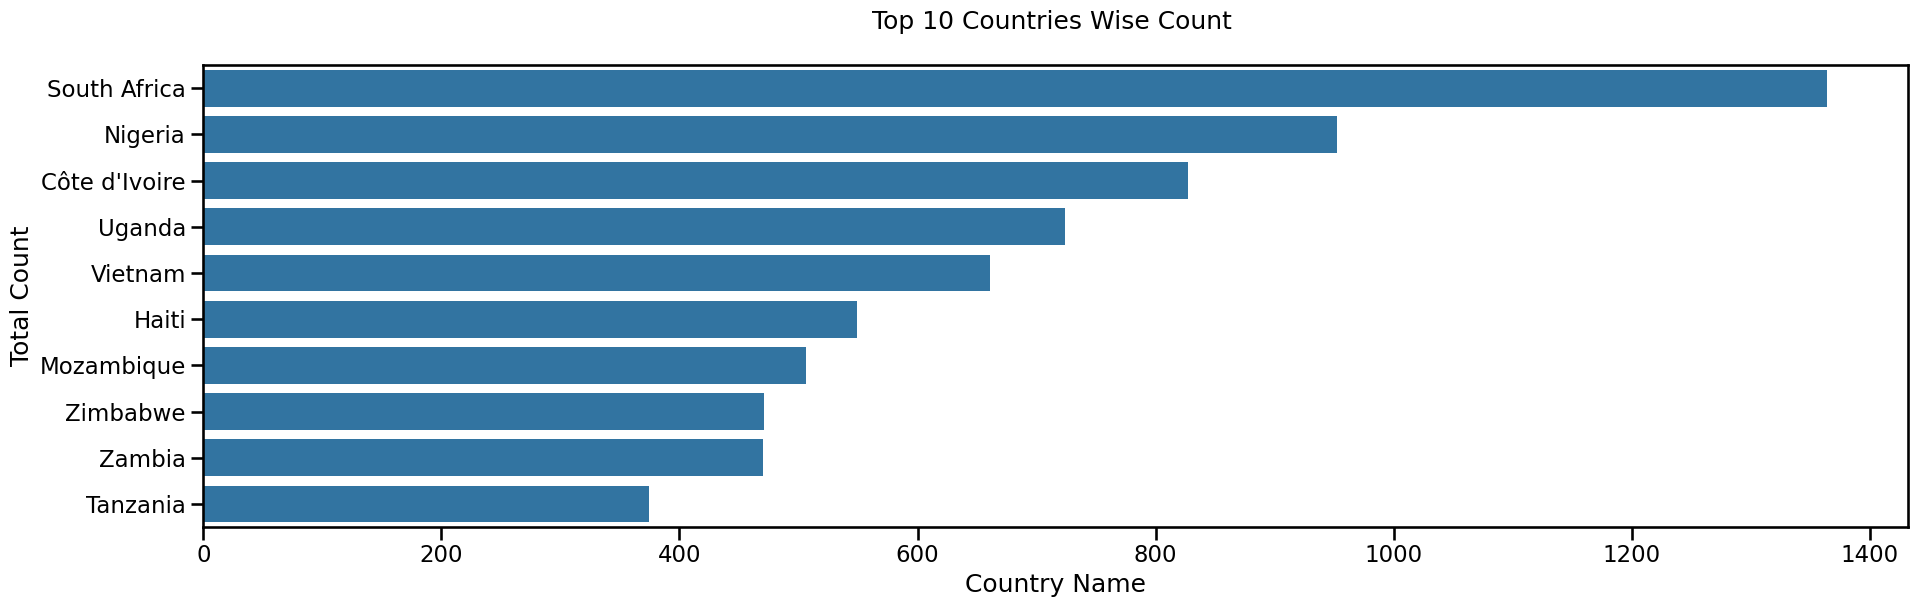

In [ ]:
sn.set_context("talk",font_scale=1)
plt.figure(figsize=(22,6))
sn.countplot(DataSet['Country'],order = DataSet['Country'].value_counts().nlargest(10).index)
plt.title('Top 10 Countries Wise Count \n')
plt.ylabel('Total Count')
plt.xlabel('Country Name')

# 2. Visualizations and EDA
### Investigating Delivery Delays

In [ ]:
DataSet

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
21,108,104-CI-T01,Pre-PQ Process,SCMS-698,ASN-727,Côte d'Ivoire,PMO - US,Direct Drop,CIP,Air,...,60,5513,140581.50,25.50,0.42,"BMS Meymac, France",Yes,2126,Freight Included in Commodity Cost,224.93
22,115,108-VN-T01,Pre-PQ Process,SCMS-753,ASN-781,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,1920.00,1.92,0.01,"Aurobindo Unit III, India",Yes,941,4193.49,3.07
23,116,108-VN-T01,Pre-PQ Process,SCMS-759,ASN-632,Vietnam,PMO - US,Direct Drop,FCA,Air,...,120,500,41095.00,82.19,0.68,ABBVIE Ludwigshafen Germany,Yes,117,1767.38,65.75
29,161,117-ET-T01,Pre-PQ Process,SCMS-11070,ASN-916,Ethiopia,PMO - US,Direct Drop,EXW,Air,...,60,64000,99200.00,1.55,0.03,"Aurobindo Unit III, India",Yes,4228,12237.61,158.72
32,269,108-VN-T01,Pre-PQ Process,SCMS-14190,ASN-1192,Vietnam,PMO - US,Direct Drop,EXW,Air,...,30,1000,17000.00,17.00,0.57,Gilead(Nycomed) Oranienburg DE,Yes,76,2282.57,27.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost,134.03


In [ ]:
DataSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8158 entries, 21 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            8158 non-null   int64  
 1   Project Code                  8158 non-null   object 
 2   PQ #                          8158 non-null   object 
 3   PO / SO #                     8158 non-null   object 
 4   ASN/DN #                      8158 non-null   object 
 5   Country                       8158 non-null   object 
 6   Managed By                    8158 non-null   object 
 7   Fulfill Via                   8158 non-null   object 
 8   Vendor INCO Term              8158 non-null   object 
 9   Shipment Mode                 8158 non-null   object 
 10  PQ First Sent to Client Date  8158 non-null   object 
 11  PO Sent to Vendor Date        8158 non-null   object 
 12  Scheduled Delivery Date       8158 non-null   object 
 13  D

In [ ]:
DataSet['Scheduled Delivery Date']  = pd.to_datetime(DataSet['Scheduled Delivery Date'])
DataSet['Delivered to Client Date']  = pd.to_datetime(DataSet['Delivered to Client Date'])
DataSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8158 entries, 21 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ID                            8158 non-null   int64         
 1   Project Code                  8158 non-null   object        
 2   PQ #                          8158 non-null   object        
 3   PO / SO #                     8158 non-null   object        
 4   ASN/DN #                      8158 non-null   object        
 5   Country                       8158 non-null   object        
 6   Managed By                    8158 non-null   object        
 7   Fulfill Via                   8158 non-null   object        
 8   Vendor INCO Term              8158 non-null   object        
 9   Shipment Mode                 8158 non-null   object        
 10  PQ First Sent to Client Date  8158 non-null   object        
 11  PO Sent to Vendor Date      

In [ ]:
DataSet['Delivery_Delay'] = DataSet['Delivered to Client Date'] - DataSet['Scheduled Delivery Date']
DataSet['Delivery_Delay'] = DataSet['Delivery_Delay'].dt.days
DataSet['Delivery_Delay']

21        0
22        0
23        0
29        0
32        0
         ..
10319   -16
10320     6
10321    -6
10322   -36
10323   -27
Name: Delivery_Delay, Length: 8158, dtype: int64

In [ ]:
DataSet.groupby('Country')['Delivery_Delay'].mean().sort_values(ascending = False).reset_index()

,Country,Delivery_Delay
0,"Congo, DRC",15.277551
1,Togo,5.333333
2,Benin,3.700000
3,Senegal,1.500000
4,Botswana,0.666667
5,Afghanistan,0.000000
6,Malawi,0.000000
7,Angola,0.000000
8,Lebanon,0.000000
9,Burkina Faso,0.000000


### Total Pack Price for Top 15 Countries using graphs

Total Pack Price for Top 15 Countries

Country
South Africa          23479.74
Vietnam               11015.11
Nigeria               10293.74
Côte d'Ivoire         10174.96
Uganda                 9781.99
Mozambique             5782.10
Haiti                  5029.42
Tanzania               4727.47
Zambia                 3780.12
Rwanda                 3721.67
Zimbabwe               3359.62
Guyana                 2209.95
Congo, DRC             2148.15
Ethiopia               1202.37
Dominican Republic     1089.23
Name: Pack Price, dtype: float64


Text(0.5, 0, 'Country Name')

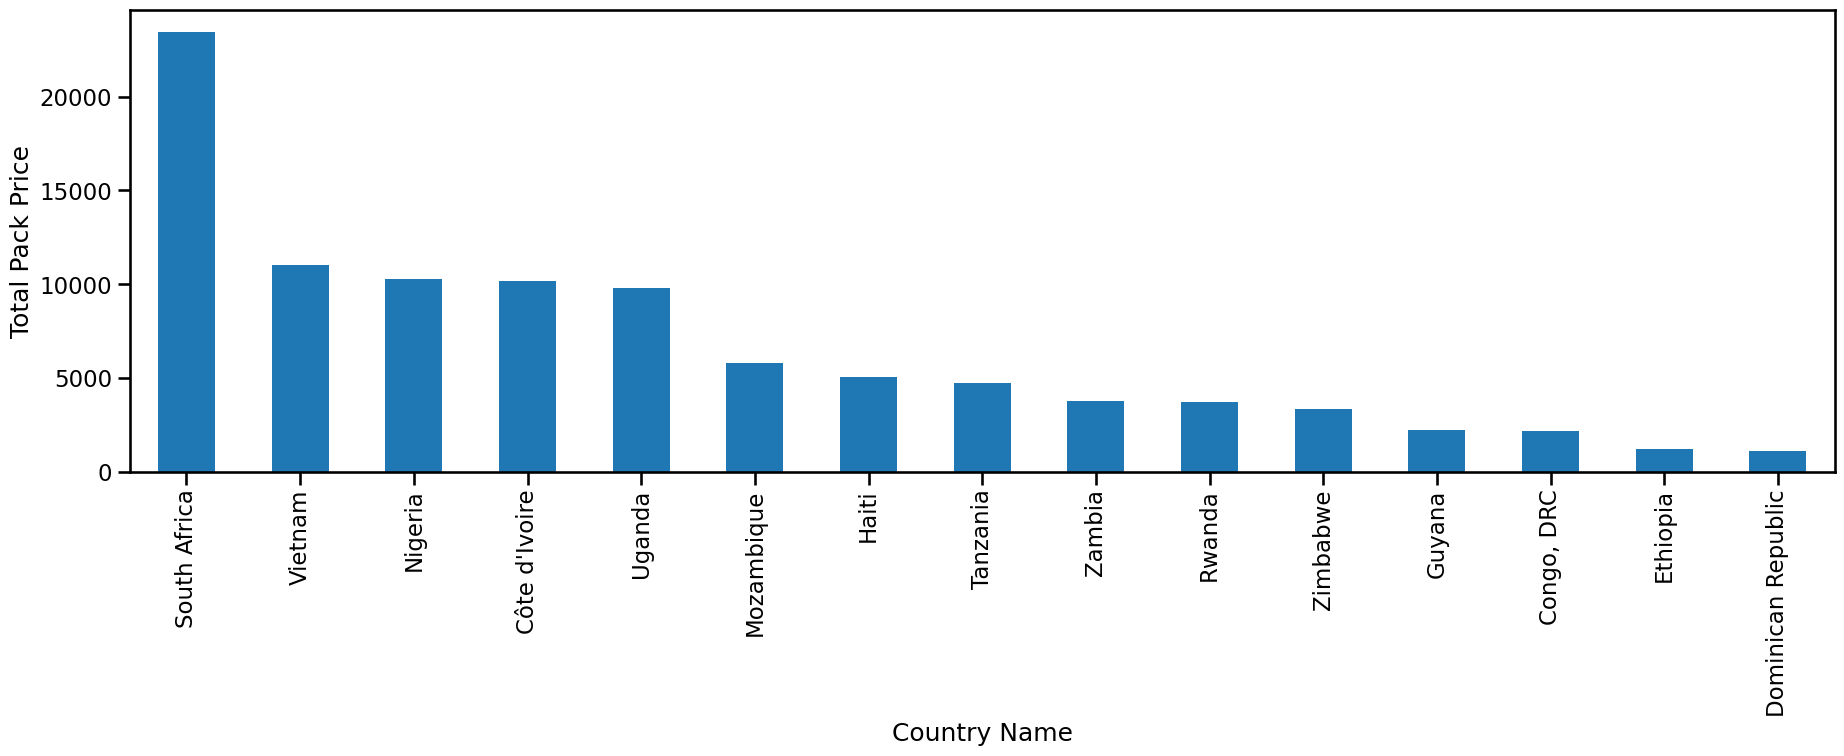

In [ ]:
TotalPrice = DataSet.groupby(['Country'])['Pack Price'].sum().nlargest(15)
print("Total Pack Price for Top 15 Countries\n")
print(TotalPrice)
plt.figure(figsize=(22,6))
GraphData=DataSet.groupby(['Country'])['Pack Price'].sum().nlargest(15)
GraphData.plot(kind='bar')
plt.ylabel('Total Pack Price')
plt.xlabel('Country Name')

### First Line Designation Wise Count

First-line designation means these medications don't require previous treatments with other drugs, therefore gaining wider access to patients.

Text(0.5, 0, 'First Line Designation')

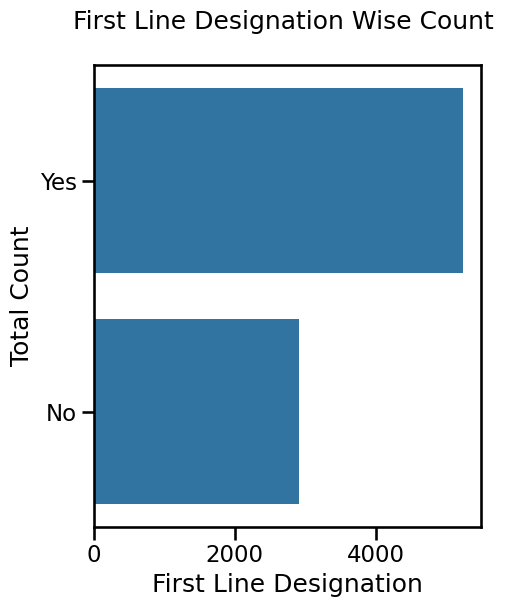

In [ ]:
sn.set_context("talk",font_scale=1)
plt.figure(figsize=(5,6))
sn.countplot(DataSet['First Line Designation'],order = DataSet['First Line Designation'].value_counts().index)
plt.title('First Line Designation Wise Count \n')
plt.ylabel('Total Count')
plt.xlabel('First Line Designation')

### Shipment Mode percentage wise Pie Chart

In [ ]:
ShippingMode = DataSet["Shipment Mode"].value_counts()
labels = (np.array(ShippingMode.index))
sizes = (np.array((ShippingMode / ShippingMode.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(title="Shipment Mode")
dat = [trace]
fig = go.Figure(data=dat, layout=layout)
py.iplot(fig, filename="Shipment Mode")

#Unquie Manufacturing Site Names

In [ ]:
UniqueItem = DataSet['Manufacturing Site'].unique()
print("All Unique Manufacturing Site \n")
print(UniqueItem)

All Unique Manufacturing Site 

['BMS Meymac, France' 'Aurobindo Unit III, India'
 'ABBVIE Ludwigshafen Germany' 'Gilead(Nycomed) Oranienburg DE'
 'Ranbaxy, Paonta Shahib, India' 'Mylan (formerly Matrix) Nashik'
 'Roche Basel' 'GSK Ware (UK)' 'Novartis Pharma AG, Switzerland'
 'BI, Ingelheim, Germany' 'Ipca Dadra/Nagar Haveli IN' 'MSD, Haarlem, NL'
 'Aspen-OSD, Port Elizabeth, SA' 'ABBVIE (Abbott) Logis. UK'
 'Gland Pharma Ltd Pally Factory' 'Cipla, Goa, India'
 'GSK Mississauga (Canada)' 'GSK Aranda' 'Hetero Unit III Hyderabad IN'
 'ABBVIE (Abbott) France' 'Strides, Bangalore, India.'
 'GSK Cape Town Factory (South Africa)' "MSD Midrand, J'burg, SA"
 'Boehringer Ing., Koropi, GR' 'GSK Crawley'
 'Novartis Pharma Suffern, USA' 'Micro Labs Ltd. (Brown & Burk), India'
 'Meditab (for Cipla) Daman IN' 'Medopharm Malur Factory, INDIA'
 'Weifa A.S., Hausmanngt. 6, P.O. Box 9113 GrÃ¸nland, 0133, Oslo, Norway'
 'MSD Manati, Puerto Rico, (USA)'
 'Emcure Plot No.P-2, I.T-B.T. Park, Phase II, MIDC

### Shipment Mode, Min and Mean value for Air

In [ ]:
ItemData=DataSet[DataSet['Shipment Mode']=='Air']
print ("The Max Air Shipment Mode is :",ItemData['Unit of Measure (Per Pack)'].max())
print ("The Min Air Shipment is :",ItemData['Unit of Measure (Per Pack)'].min())
ItemTypeMean = ItemData['Unit of Measure (Per Pack)'].mean()
print ("The Mean Air Shipment is :", round(ItemTypeMean,2))

The Max Air Shipment Mode is : 1000
The Min Air Shipment is : 5
The Mean Air Shipment is : 89.33


# 3. Manufacturing Site Visualizations
Top 10 Manufacturing Site for all Shipment Mode with Graph

Manufacturing Site
Aurobindo Unit III, India         2978
Mylan (formerly Matrix) Nashik    1407
Hetero Unit III Hyderabad IN       868
Cipla, Goa, India                  624
Strides, Bangalore, India.         528
ABBVIE Ludwigshafen Germany        350
ABBVIE (Abbott) Logis. UK          204
BMS Meymac, France                 129
Aspen-OSD, Port Elizabeth, SA      125
MSD, Haarlem, NL                   117
dtype: int64


Text(0.5, 0, 'Manufacturing Site Name')

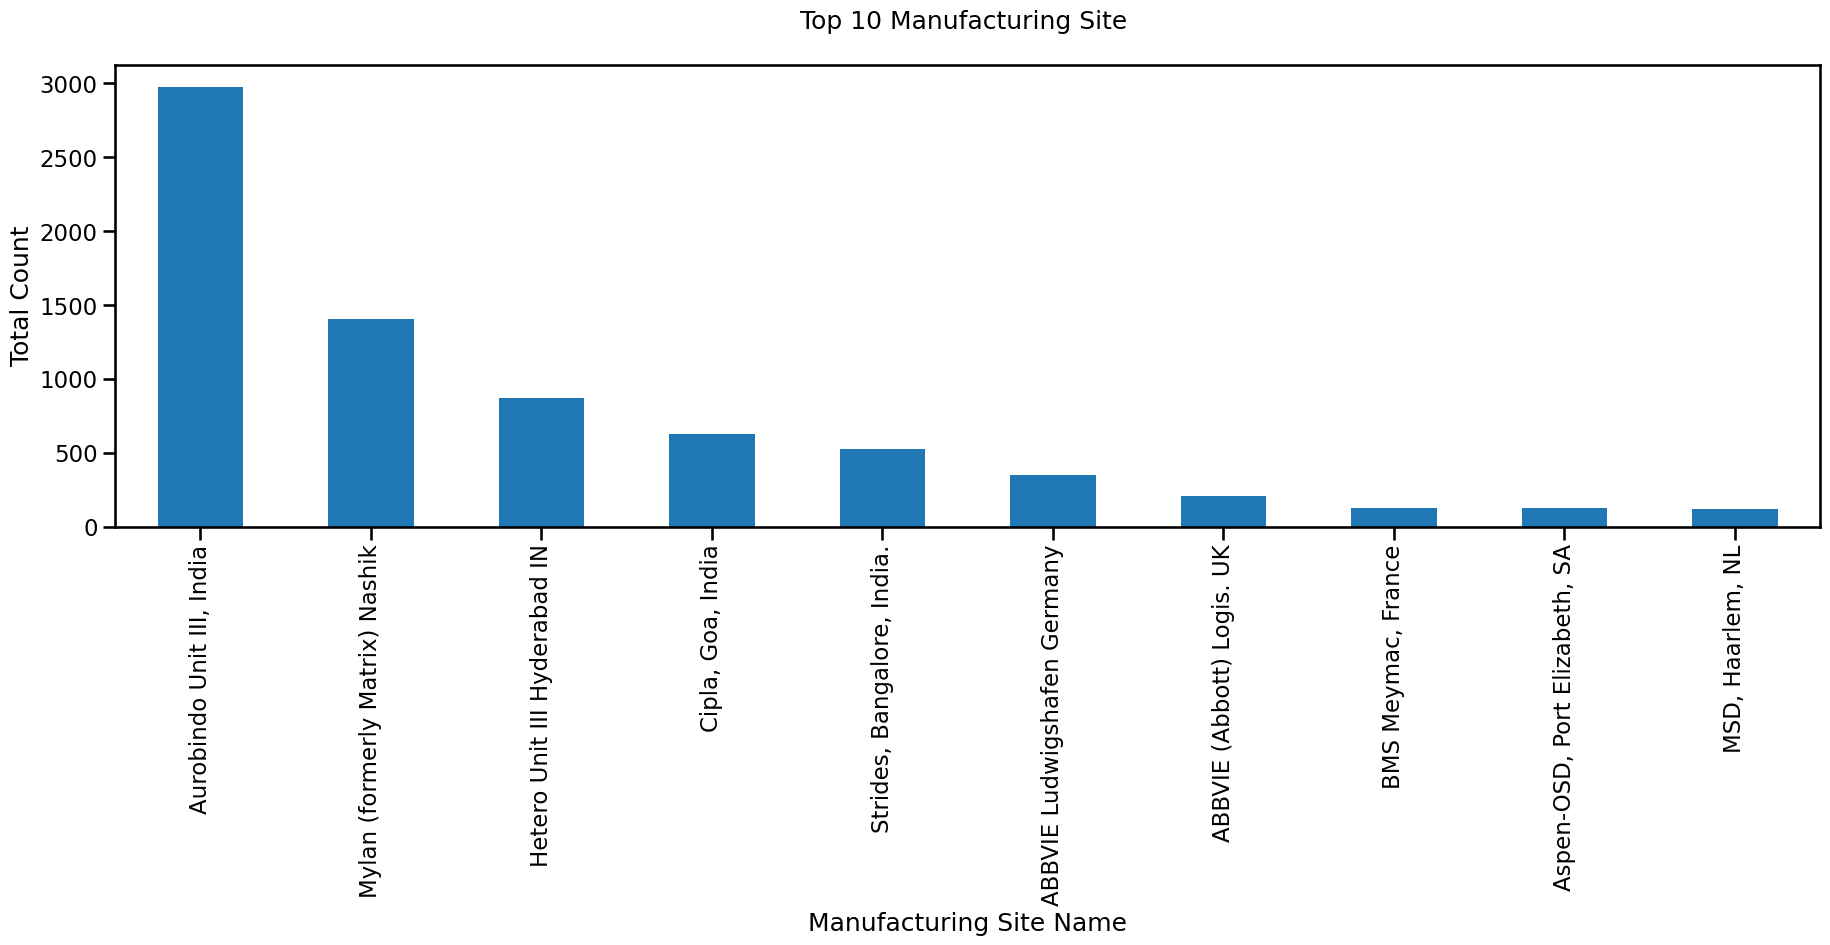

In [ ]:

TopTenManufacturingSite = DataSet.groupby('Manufacturing Site').size().nlargest(10)
print(TopTenManufacturingSite)

plt.figure(figsize=(22,6))
TopTenManufacturingSite.plot(kind='bar')
plt.title('Top 10 Manufacturing Site \n')
plt.ylabel('Total Count')
plt.xlabel('Manufacturing Site Name')

### Top 10 Manufacturing Site for Air Shipment Mode with Graph

Top 10 Air Manufacturing Site 

Aurobindo Unit III, India         1641
Mylan (formerly Matrix) Nashik     695
Hetero Unit III Hyderabad IN       417
ABBVIE Ludwigshafen Germany        281
Cipla, Goa, India                  264
Strides, Bangalore, India.         251
ABBVIE (Abbott) Logis. UK          147
MSD, Haarlem, NL                    90
BMS Meymac, France                  83
Aspen-OSD, Port Elizabeth, SA       80
Name: Manufacturing Site, dtype: int64


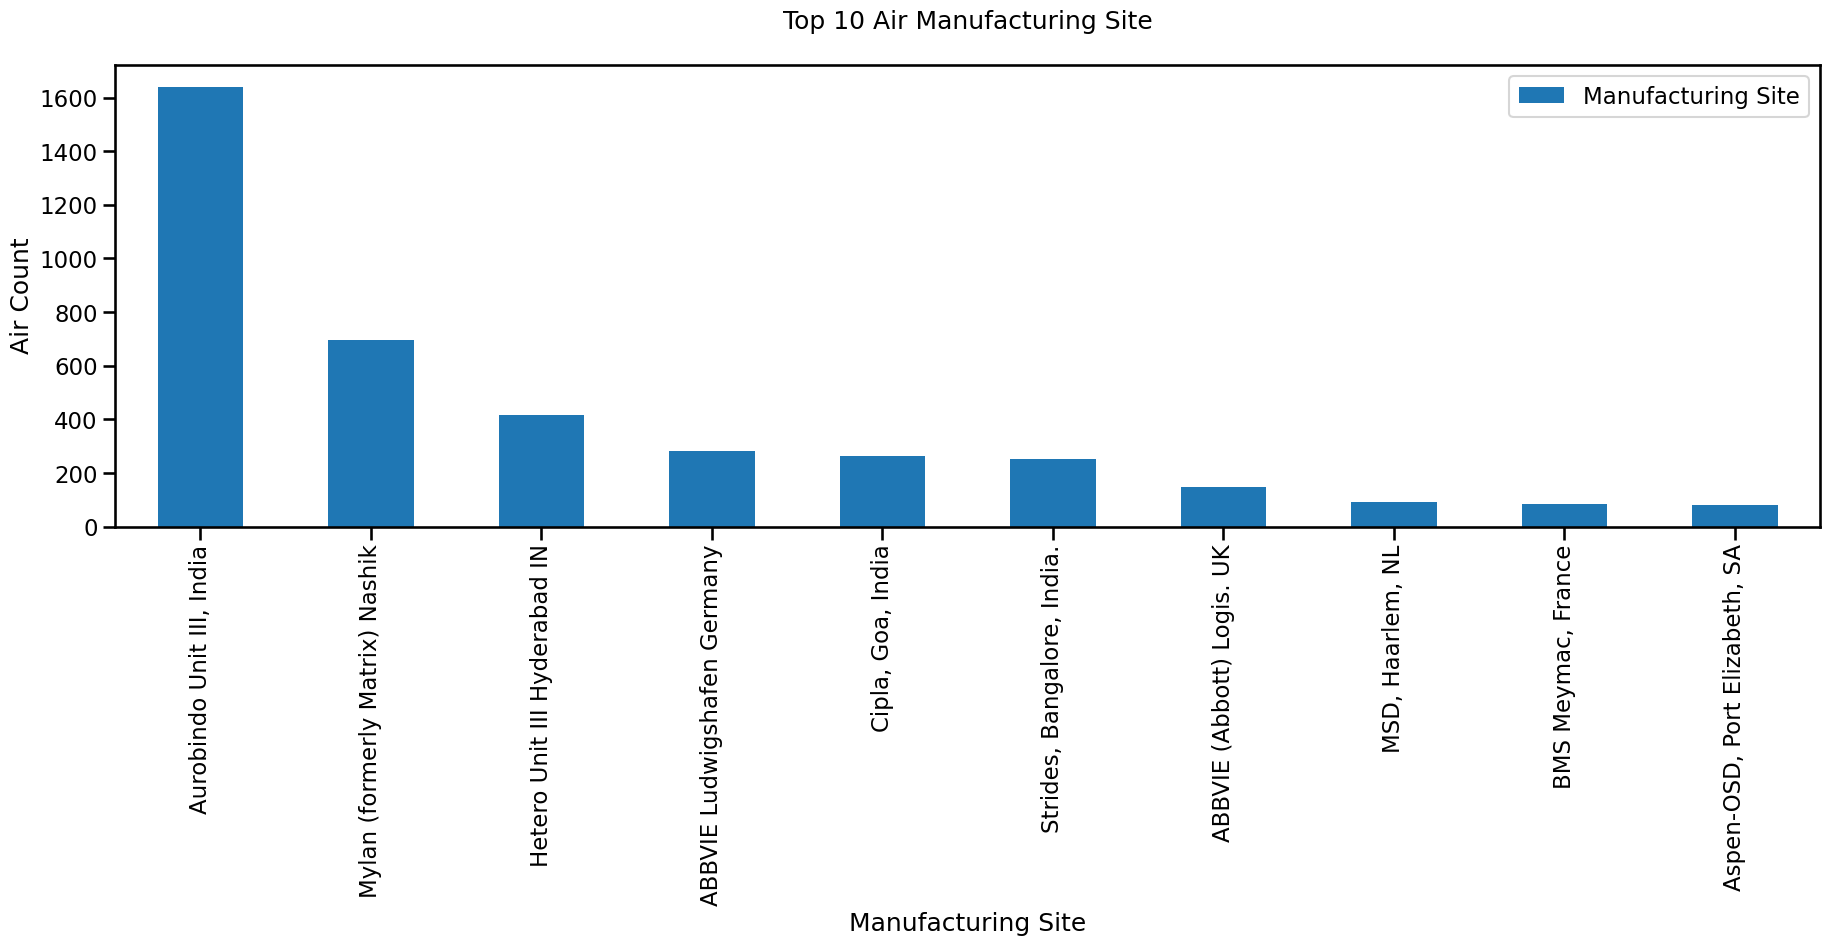

In [ ]:
# Top 10 Air Shipment Mode in Bar Chart
ItemData = DataSet[DataSet['Shipment Mode']=='Air']
DataSet[DataSet["Shipment Mode"]=='Air']['Manufacturing Site'].value_counts()[0:10].to_frame().plot.bar(figsize=(22,6))

plt.title('Top 10 Air Manufacturing Site\n')
plt.ylabel('Air Count')
plt.xlabel('Manufacturing Site')

ItemSupplier = DataSet[DataSet["Shipment Mode"]=='Air']['Manufacturing Site'].value_counts()[0:10]
print("Top 10 Air Manufacturing Site \n")
print(ItemSupplier)

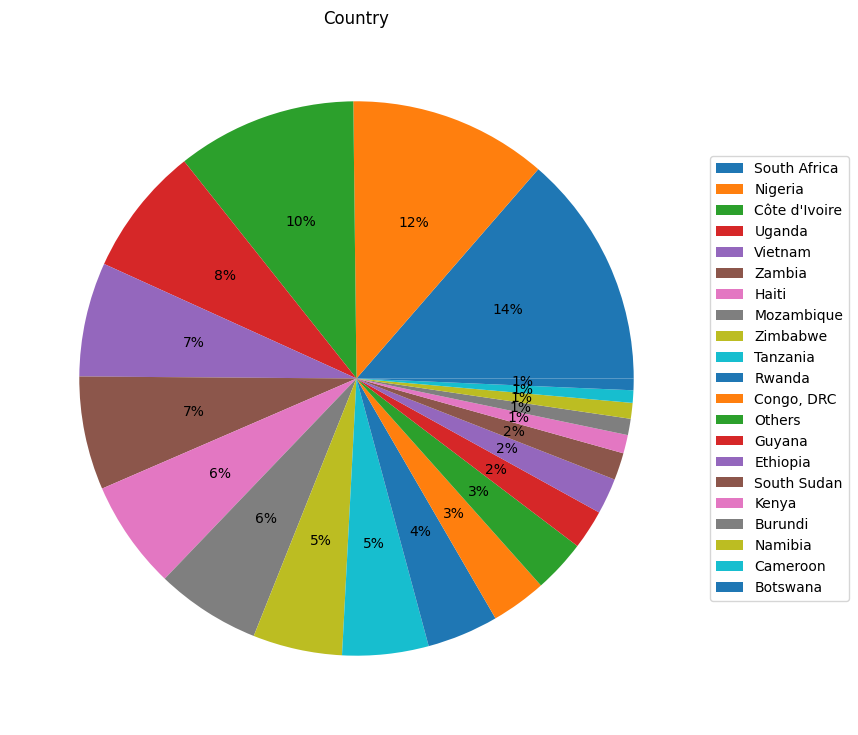

In [ ]:
counts = df['Country'].value_counts()
idx = counts[counts.lt(60)].index
df.loc[df['Country'].isin(idx), 'Country'] = 'Others'
df["Country"].value_counts().plot.pie(label='',title="Country",legend=True,figsize=(9,9),autopct='%1.0f%%',labeldistance=None)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

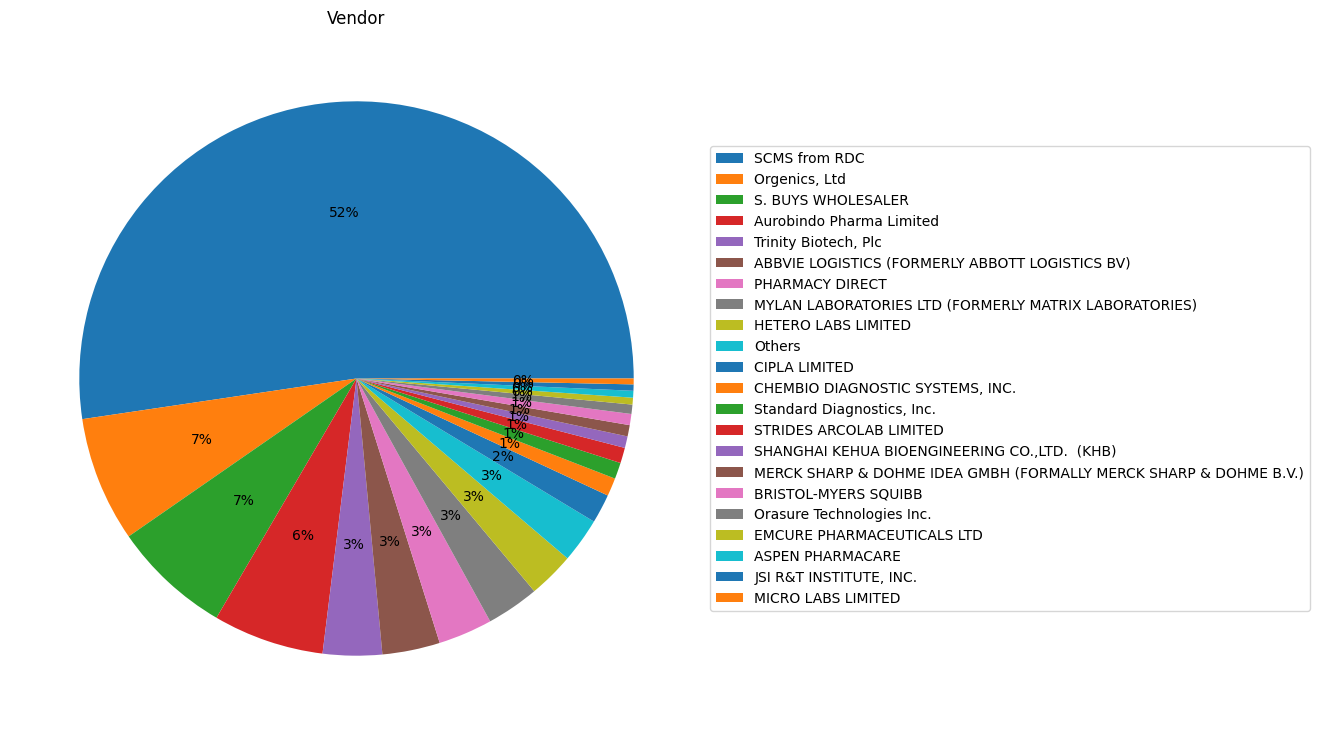

In [ ]:
counts = df['Vendor'].value_counts()
idx = counts[counts.lt(30)].index
df.loc[df['Vendor'].isin(idx), 'Vendor'] = 'Others'
df["Vendor"].value_counts().plot.pie(label='',title="Vendor",legend=True,figsize=(9,9),autopct='%1.0f%%',labeldistance=None)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

## Conclusion
- Top Country for Pack Price : Nigeria - 25,620.72
- Top Shipping Mode : Air
- The Max Air Shipment Mode is : 1000
- The Min Air Shipment is : 1
- The Mean Air Shipment is : 82.35
- Top Manufacturing Site : Aurobindo Unit III, India - 3172
- Top Air Manufacturing Site : Aurobindo Unit III, India - 1694

In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
def preprocess_inputs(df, label_mapping):
    df = df.copy()

    # Dropping ID Column Because That Is Unique For Each Shipment & Doesn't Serve Any Process
    df = df.drop('ID', axis=1)

    # Dropping Missing Values in Target Rows Of [Shipment Mode] Column as that is our target column and we don't to do prediction on fabricated dat

    missing_target_rows = df[df['Shipment Mode'].isna()].index
    df = df.drop(missing_target_rows, axis=0).reset_index(drop=True)

    # Filling Missing values
    df['Dosage'] = df['Dosage'].fillna(df['Dosage'].mode()[0])
    df['Line Item Insurance (USD)'] = df['Line Item Insurance (USD)'].fillna(df['Line Item Insurance (USD)'].mean())

    # Drop Date Column With Too Many Missing Values
    df = df.drop(['PQ First Sent to Client Date','PO Sent to Vendor Date'],axis=1)

    # Extract Date Features
    for column in ['Scheduled Delivery Date', 'Delivered to Client Date', 'Delivery Recorded Date']:
        df[column] = pd.to_datetime(df[column])
        df[column + ' Year'] = df[column].apply(lambda x : x.year)
        df[column + ' Month'] = df[column].apply(lambda x : x.month)
        df[column + ' Day'] = df[column].apply(lambda x : x.day)
        df = df.drop(column, axis=1)

    # Drop Numeric Columns for too many missing values
    df = df.drop(['Weight (Kilograms)','Freight Cost (USD)'], axis=1)

    # Drop High Cardinality Columns
    df = df.drop(['PQ #','PO / SO #','ASN/DN #'], axis=1)

    # Binary Encoding
    df['Fulfill Via'] = df['Fulfill Via'].replace({'Direct Drop':0,'From RDC':1})
    df['First Line Designation'] = df[ 'First Line Designation'].replace({'No':0, 'Yes':1})

    # One-Hot Encoding
    for column in df.select_dtypes('object').columns.drop('Shipment Mode'):
        dummies = pd.get_dummies(df[column], prefix=column)
        df = pd.concat([df, dummies], axis = 1)
        df = df.drop(column, axis=1)

    # Splitting The DataFrame into X and y
    y = df['Shipment Mode']
    X = df.drop('Shipment Mode', axis=1)

    # Encoding The Labels In Shipment Mode
    y = y.replace(label_mapping)

    # Train Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

    return X_train, X_test, y_train, y_test


In [12]:
LABEL_MAPPING = {
    'Air': 0,
    'Truck': 1,
    'Air Charter': 2,
    'Ocean': 3
}

X_train, X_test, y_train, y_test = preprocess_inputs(df, label_mapping=LABEL_MAPPING)

In [13]:
X_train

,Fulfill Via,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,First Line Designation,Line Item Insurance (USD),Scheduled Delivery Date Year,Scheduled Delivery Date Month,...,Manufacturing Site_Ranbaxy per Shasun Pharma Ltd,"Manufacturing Site_Ranbaxy, Paonta Shahib, India","Manufacturing Site_Remedica, Limassol, Cyprus",Manufacturing Site_Roche Basel,Manufacturing Site_Roche Madrid,"Manufacturing Site_Standard Diagnostics, Korea","Manufacturing Site_Strides, Bangalore, India.","Manufacturing Site_Trinity Biotech, Plc","Manufacturing Site_Weifa A.S., Hausmanngt. 6, P.O. Box 9113 GrÃ¸nland, 0133, Oslo, Norway",Manufacturing Site_bioLytical Laboratories
8905,0.975074,-0.228739,-0.426393,-0.442833,-0.365576,-0.221030,0.673216,-0.471452,1.087860,0.760567,...,-0.011975,-0.057523,-0.011975,-0.058764,-0.031698,-0.102136,-0.242388,-0.197963,-0.011975,-0.023956
1414,0.975074,-0.228739,0.198248,0.418854,-0.218907,-0.172736,0.673216,0.702302,-0.994006,0.456201,...,-0.011975,-0.057523,-0.011975,-0.058764,-0.031698,-0.102136,-0.242388,-0.197963,-0.011975,-0.023956
1409,0.975074,-0.228739,0.532553,0.366882,-0.309884,-0.203468,0.673216,0.632237,-0.994006,-0.152532,...,-0.011975,-0.057523,-0.011975,-0.058764,-0.031698,-0.102136,4.125612,-0.197963,-0.011975,-0.023956
874,-1.025563,0.291362,-0.450154,-0.274234,2.493413,0.354098,0.673216,-0.278564,-1.410379,-1.674365,...,-0.011975,-0.057523,-0.011975,-0.058764,-0.031698,-0.102136,-0.242388,5.051446,-0.011975,-0.023956
1941,0.975074,-0.618816,0.159722,0.338381,-0.227409,-0.093711,0.673216,0.593803,-0.994006,-0.456899,...,-0.011975,-0.057523,-0.011975,-0.058764,-0.031698,-0.102136,-0.242388,-0.197963,-0.011975,-0.023956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,-1.025563,-0.228739,-0.407975,-0.436590,-0.377267,-0.225420,-1.485408,-0.467031,1.087860,1.064934,...,-0.011975,-0.057523,-0.011975,-0.058764,-0.031698,-0.102136,-0.242388,-0.197963,-0.011975,-0.023956
7813,0.975074,-0.228739,-0.005566,-0.331187,-0.409364,-0.238591,0.673216,-0.358993,0.255114,0.760567,...,-0.011975,-0.057523,-0.011975,-0.058764,-0.031698,-0.102136,-0.242388,-0.197963,-0.011975,-0.023956
905,-1.025563,-0.618816,1.611276,2.247912,-0.223796,-0.093711,0.673216,2.497515,-1.410379,0.760567,...,-0.011975,-0.057523,-0.011975,-0.058764,-0.031698,-0.102136,-0.242388,-0.197963,-0.011975,-0.023956
5192,-1.025563,0.291362,-0.281635,1.413370,1.430592,0.134584,0.673216,2.296044,-0.577633,1.369300,...,-0.011975,-0.057523,-0.011975,-0.058764,-0.031698,-0.102136,-0.242388,-0.197963,-0.011975,-0.023956


In [14]:
y_train

8905    1
1414    2
1409    2
874     0
1941    2
       ..
2895    3
7813    1
905     0
5192    0
235     0
Name: Shipment Mode, Length: 6974, dtype: int64

In [15]:
y_train.value_counts()

0    4317
1    1950
2     449
3     258
Name: Shipment Mode, dtype: int64

In [16]:
X_train.shape

(6974, 771)

In [17]:
import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report


In [19]:

inputs = tf.keras.Input(shape=(771,))
x = tf.keras.layers.Dense(128, activation='relu')(inputs)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)


Epoch 1/100
175/175 [==============================] - 2s 5ms/step - loss: 0.4600 - accuracy: 0.8193 - val_loss: 0.3167 - val_accuracy: 0.8760
Epoch 2/100
175/175 [==============================] - 1s 4ms/step - loss: 0.2273 - accuracy: 0.9064 - val_loss: 0.3075 - val_accuracy: 0.8824
Epoch 3/100
175/175 [==============================] - 1s 5ms/step - loss: 0.2007 - accuracy: 0.9131 - val_loss: 0.3014 - val_accuracy: 0.8781
Epoch 4/100
175/175 [==============================] - 1s 6ms/step - loss: 0.1782 - accuracy: 0.9206 - val_loss: 0.2931 - val_accuracy: 0.8846
Epoch 5/100
175/175 [==============================] - 1s 6ms/step - loss: 0.1616 - accuracy: 0.9308 - val_loss: 0.2929 - val_accuracy: 0.8882
Epoch 6/100
175/175 [==============================] - 1s 6ms/step - loss: 0.1575 - accuracy: 0.9281 - val_loss: 0.2854 - val_accuracy: 0.8910
Epoch 7/100
175/175 [==============================] - 1s 3ms/step - loss: 0.1416 - accuracy: 0.9392 - val_loss: 0.3062 - val_accuracy: 0.8839

In [20]:
y_pred = np.argmax(model.predict(X_test), axis=1)

cm = confusion_matrix(y_test, y_pred, labels=list(LABEL_MAPPING.values()))
clr = classification_report(y_test, y_pred, labels=list(LABEL_MAPPING.values()), target_names=list(LABEL_MAPPING.keys()))

print("Test Set Accuracy: {:.2f}%".format(model.evaluate(X_test, y_test, verbose=0)[1] * 100))

94/94 [==============================] - 0s 2ms/step
Test Set Accuracy: 88.86%


94/94 [==============================] - 0s 3ms/step


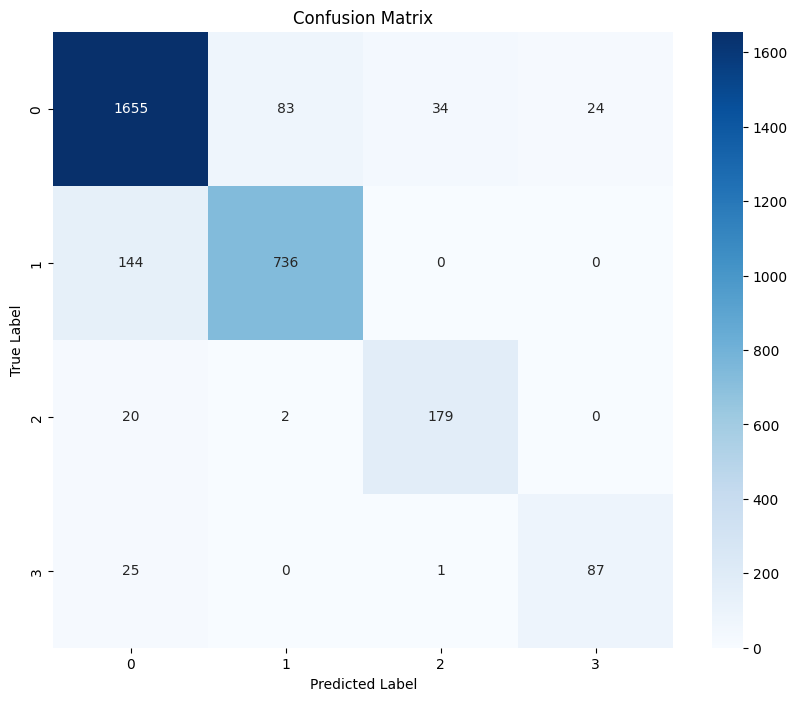

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming 'y_test' contains the actual targets and 'model' is your trained model
y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)  # If using softmax output from neural network

# 1. Plotting Predicted vs Actual values comparison
# For a classification problem, a confusion matrix is a good way to compare
conf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


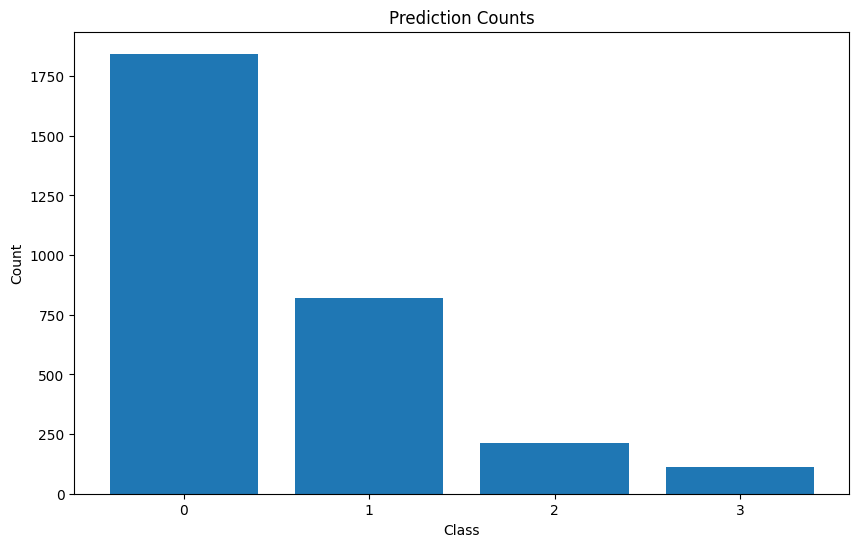

In [22]:

# 2. Plotting predictions
# If predictions are categorical, you can use a bar chart to show the count of predictions for each class
plt.figure(figsize=(10, 6))
unique, counts = np.unique(y_pred_class, return_counts=True)
plt.bar(unique, counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Prediction Counts')
plt.xticks(unique)
plt.show()

# If your model is a regression model, you might plot actual vs. predicted values like this:
# plt.scatter(y_test, y_pred)  # Scatter plot for actual vs. predicted values
# plt.xlabel('Actual Values')
# plt.ylabel('Predicted Values')
# plt.title('Actual vs. Predicted Values')
# plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])  # A reference line
# plt.show()
